In [29]:
import numpy as np
import scipy.interpolate
import scipy.integrate
import matplotlib.pyplot as plt

dir='/Users/patrickingraham/LSST/Aux_tel_SNR_calculation/'

In [44]:
# read in csv file of M2 and M3
UV350AG_data = np.genfromtxt(dir+'mirror_coatings/UV350AG_hard_coating_sorted.csv',
                          delimiter=',',comments='#')
#print(UV350AG_data[:,3])
# read in csv file of protected Aluminum coating (based on LSST design)
Protected_Aluminum_data = np.genfromtxt(dir+'mirror_coatings/prot_Al_from_LST66.csv',
                          delimiter=',',comments='#')
#print(Protected_Aluminum_data[:,1])

In [55]:
wavelength_array = np.arange(300.0,1100.0,1.0)

#Assume 6 degree AOI for M2 - column 1
M2_reflectivity = scipy.interpolate.griddata(UV350AG_data[:,0], UV350AG_data[:,1],
                                             wavelength_array, method='linear') / 100
#Assume 45 degree AOI for M3 - column 3
M3_reflectivity = scipy.interpolate.griddata(UV350AG_data[:,0], UV350AG_data[:,3],
                                             wavelength_array, method='linear') / 100
# M1 will be coated using protected alumninum in the LSST chamber
M1_reflectivity = scipy.interpolate.griddata(Protected_Aluminum_data[:,0], Protected_Aluminum_data[:,1], 
                                             wavelength_array, method='linear')


In [56]:
all_aluminum_coatings = M1_reflectivity**3.0

mixed_coatings = M1_reflectivity * M2_reflectivity * M3_reflectivity
#print(mixed_coatings)

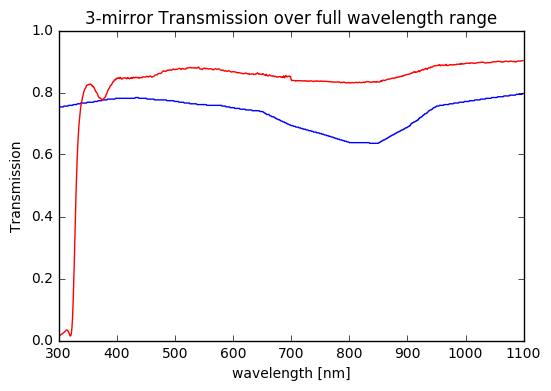

In [59]:
# plot transmission as a function of wavelength
plt.plot(wavelength_array,all_aluminum_coatings,'-b')
plt.plot(wavelength_array,mixed_coatings,'-r')
plt.title('3-mirror Transmission over full wavelength range')
plt.xlabel('wavelength [nm]')
plt.ylabel('Transmission')
plt.xlim(300,1100)
plt.ylim(0,1)
plt.show()
plt.close()

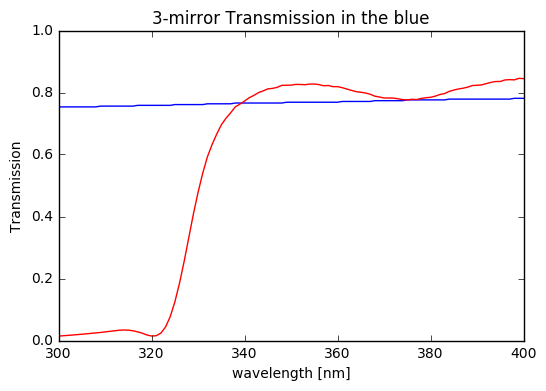

In [60]:
# plot transmission as a function of wavelength
plt.plot(wavelength_array,all_aluminum_coatings,'-b')
plt.plot(wavelength_array,mixed_coatings,'-r')
plt.title('3-mirror Transmission in the blue')
plt.xlabel('wavelength [nm]')
plt.ylabel('Transmission')
plt.xlim(300,400)
plt.ylim(0,1)
plt.show()
plt.close()